In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read VA datasets
df_va1 = pd.read_csv("va_scan_result_1.csv")
df_va2 = pd.read_csv("va_scan_result_2.csv", low_memory=False)

In [ ]:
# Clean column names
def clean_column_names(df):
    df.columns = (
        df.columns.str.strip()
        .str.lower()
        .str.replace(" ", "_")
        .str.replace(r"[^\w\s]", "", regex=True)
    )
    return df

In [4]:
# Apply the cleaning function to the DataFrame
df_va1 = clean_column_names(df_va1)
df_va2 = clean_column_names(df_va2)

In [ ]:
# Clean and standardize the data
def clean_va_data(df):
    df = df.copy()
    df['cvss'] = df['cvss'].fillna(0)

    risk_categories = ['None', 'Low', 'Medium', 'High', 'Critical', 'N/A']
    df['risk'] = pd.Categorical(df['risk'], categories=risk_categories, ordered=True)
    df['risk'] = df['risk'].fillna("N/A")

    df['severity'] = df['severity'].map({
        0: "Informational", 1: "Low", 2: "Medium", 3: "High", 4: "Critical"
    }).fillna("Unknown")

    for col in df.columns:
        if df[col].dtype == 'object' and df[col].str.contains(r'\d{2}:\d{2}:\d{2}', na=False).any():
            df[col] = pd.to_datetime(df[col], errors='coerce').dt.date

    df = df.fillna("N/A")
    return df

In [ ]:
# Apply the cleaning function to the DataFrame
df_va1_clean = clean_va_data(df_va1)
df_va2_clean = clean_va_data(df_va2)

In [7]:
# Combine the cleaned DataFrames
df_va = pd.concat([df_va1_clean, df_va2_clean], ignore_index=True)

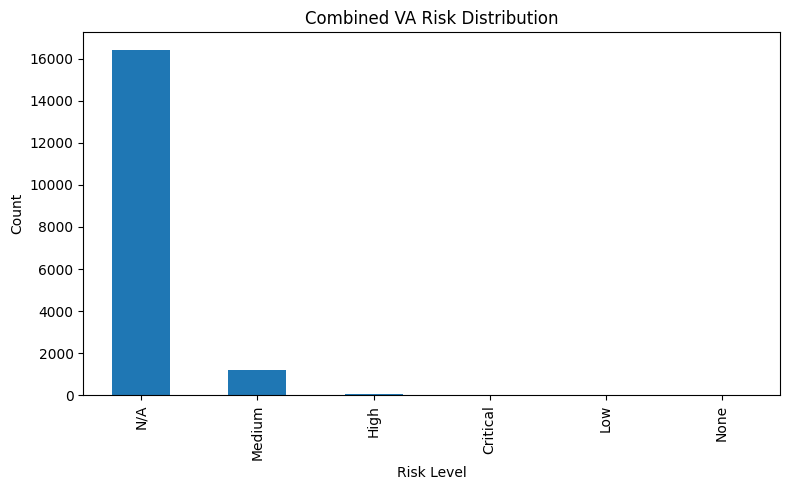

In [8]:
# Risk Distribution Plot
plt.figure(figsize=(8, 5))
df_va['risk'].value_counts().plot(kind='bar')
plt.title('Combined VA Risk Distribution')
plt.xlabel('Risk Level')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('combined_va_risk_distribution.png')
plt.show()

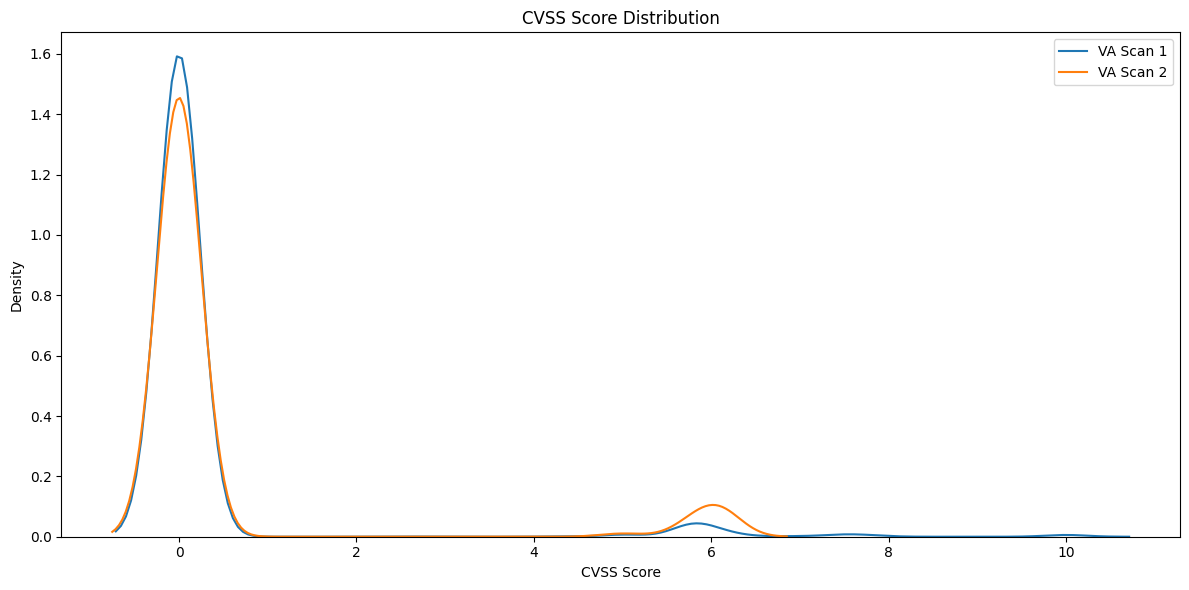

In [9]:
# CVSS KDE Plot
plt.figure(figsize=(12, 6))
sns.kdeplot(df_va1_clean['cvss'], label='VA Scan 1')
sns.kdeplot(df_va2_clean['cvss'], label='VA Scan 2')
plt.title('CVSS Score Distribution')
plt.xlabel('CVSS Score')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.savefig('cvss_distribution.png')
plt.show()

In [10]:
# Technical report
def generate_va_report():
    va_findings = {
        'total_vulnerabilities': len(df_va),
        'risk_counts': df_va['risk'].value_counts(),
        'top_vulnerabilities': df_va['name'].value_counts().head(5)
    }

    with open('va_technical_report.txt', 'w') as f:
        f.write("VA Scan Technical Report\n")
        f.write("===========================================================\n\n")
        f.write(f"- Total Vulnerabilities: {va_findings['total_vulnerabilities']}\n")
        f.write("- Risk Level Counts:\n")
        f.write(va_findings['risk_counts'].to_string())
        f.write("\n- Top Vulnerabilities:\n")
        f.write(va_findings['top_vulnerabilities'].to_string())
        f.write("\n")

In [11]:
generate_va_report()
print("VA report generated: va_technical_report.txt.")

VA report generated: va_technical_report.txt.


In [12]:
# Export cleaned datasets
df_va1_clean.to_excel('cleaned_va1_findings.xlsx', index=False)
df_va2_clean.to_excel('cleaned_va2_findings.xlsx', index=False)
df_va.to_excel('combined_va_findings.xlsx', index=False)
print("VA datasets exported to Excel.")

VA datasets exported to Excel.
